There are 5846 rows and 3 columns
ham     4510
spam    1336
Name: Category, dtype: int64


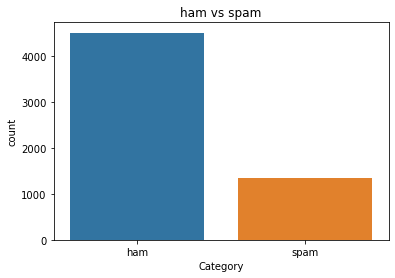

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
6      even brother like speak treat like aid patent      0
X_train: (4676,)


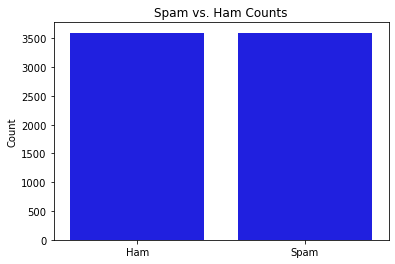

In [1]:
# Import preprocessed data
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

In [2]:
# Train the model using Decision Tree Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from scipy.stats import randint

model = tree.DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "min_samples_leaf": randint(1, 9),
                "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(model, param_dist, cv=5)
tree_cv.fit(X_train, y_train)

# Test model

y_pred = tree_cv.predict(X_test)

In [3]:
# Evaluate accuracy of model

from sklearn.metrics import classification_report
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy:  89.23076923076924
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       911
           1       0.72      0.85      0.78       259

    accuracy                           0.89      1170
   macro avg       0.84      0.88      0.85      1170
weighted avg       0.90      0.89      0.90      1170



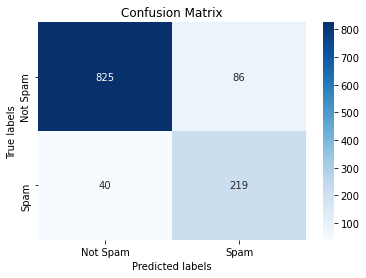

In [4]:
# Plot Confusion Matrix

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='');

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']);
ax.set_ylabel('True labels');
ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);